# Неконтролируемое машинное обучение для сегментации рынка клиентов

В этом практическом проекте мы будем обучать алгоритмы машинного обучения без учителя для проведения сегментации рынка клиентов. Сегментация рынка очень важна для маркетологов, поскольку она позволяет им запускать целевые рекламные маркетинговые кампании, ориентированные на конкретные потребности клиентов. Данные для обучение были полученный на сайте [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). Мы выполним следующие этапы:

* Импорт наборов данных и библиотек
* Выполняем визуализацию данных
* Нахождение оптимального количества кластеров с помощью метода локтя
* Применяем метод k-средних
* Применяемый анализ главных компонент и визуализируем результаты

### Импорт наборов данных и библиотек

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("darkgrid")
sns.set_palette("pastel")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data.csv')
df.head()
# CUSTID: Идентификатор владельца кредитной карты 
# BALANCE: сумма баланса, оставшаяся на счету клиента для совершения покупок
# BALANCE_FREQUENCY: Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
# PURCHASES: Сумма покупок, совершенных со счета
# ONEOFFPURCHASES: Максимальная сумма покупок, совершенных за один раз
# INSTALLMENTS_PURCHASES: Сумма покупки, совершенной в рассрочку
# CASH_ADVANCE: Денежные средства в качестве аванса, выданные пользователем
# PURCHASES_FREQUENCY: Как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупают, 0 = не часто покупают)
# ONEOFF_PURCHASES_FREQUENCY: Как часто покупки совершаются за один раз (1 = часто покупается, 0 = не часто покупается)
# PURCHASES_INSTALLMENTS_FREQUENCY: Как часто совершаются покупки в рассрочку (1 = часто, 0 = не часто)
# CASH_ADVANCE_FREQUENCY: Как часто выплачивается аванс наличными.
# CASH_ADVANCE_TRX: количество сделок, совершенных с "наличными в рассрочку"
# PURCHASES_TRX: Количество совершенных транзакций покупки
# CREDIT_LIMIT: Лимит кредитной карты для пользователя
# PAYMENTS: Сумма платежей, совершенных пользователем
# MINIMUM_PAYMENTS: Минимальная сумма платежей, совершенных пользователем  
# PRC_FULL_PAYMENT: Процент от полной оплаты, произведенной пользователем
# TENURE: Срок обслуживания кредитной карты для пользователя

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Давайте применим метод info и получим дополнительные сведения о нашем массиве данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()
# Давайте применим метод describe() и получим больше статистических данных о нашем массиве данных
# Средний баланс составляет $1564 
# Частота обновления баланса в среднем ~0.9
# Средняя сумма покупок составляет $1000
# Средняя сумма разовой покупки составляет ~$600
# Средняя частота покупок составляет около 0,5
# Средняя частота покупок ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY и CASH_ADVANCE_FREQUENCY в целом низкая
# Средний кредитный лимит ~ 4500
# Процент полной оплаты составляет 15%
# Средний срок владения кредитом 11 лет

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Выполняем визуализацию данных

In [5]:
# Давайте посмотрим, есть ли у нас недостающие данные.
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Заполните недостающие элементы средним значением 
df.fillna(df.mean().round(1), inplace=True)

In [7]:
# Для данного проекта на не требуется идентификатор клиента поэтому мы ее сбрасываем
df.drop('CUST_ID', axis = 1, inplace = True)

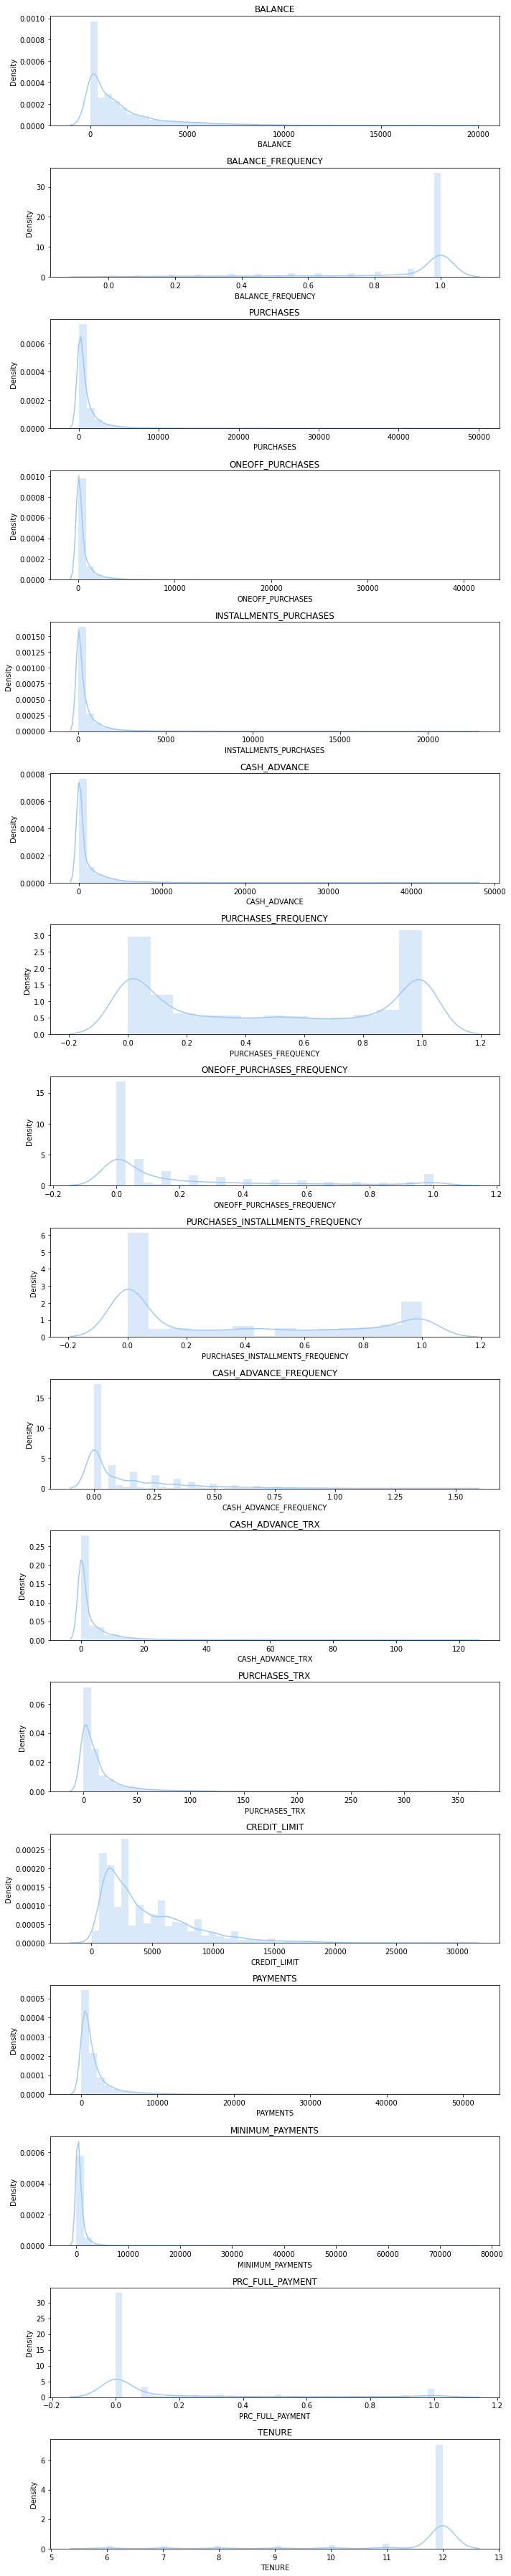

In [8]:
# distplot объединяет функцию matplotlib.hist с функцией seaborn kdeplot()
# KDE Plot представляет оценку плотности распределения ядра.

# Среднее значение баланса составляет $1500
# 'Balance_Frequency' для большинства клиентов обновляется часто ~1
# Для 'PURCHASES_FREQUENCY' есть две различные группы клиентов.
# Для 'ONEOFF_PURCHASES_FREQUENCY' и 'PURCHASES_INSTALLMENT_FREQUENCY' большинство пользователей не совершают разовых покупок или покупок в рассрочку часто 
# Очень небольшое количество клиентов полностью оплачивают свой баланс 'PRC_FULL_PAYMENT'~0
# Средний кредитный лимит составляет около $4500

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])

plt.tight_layout()
plt.show("png")

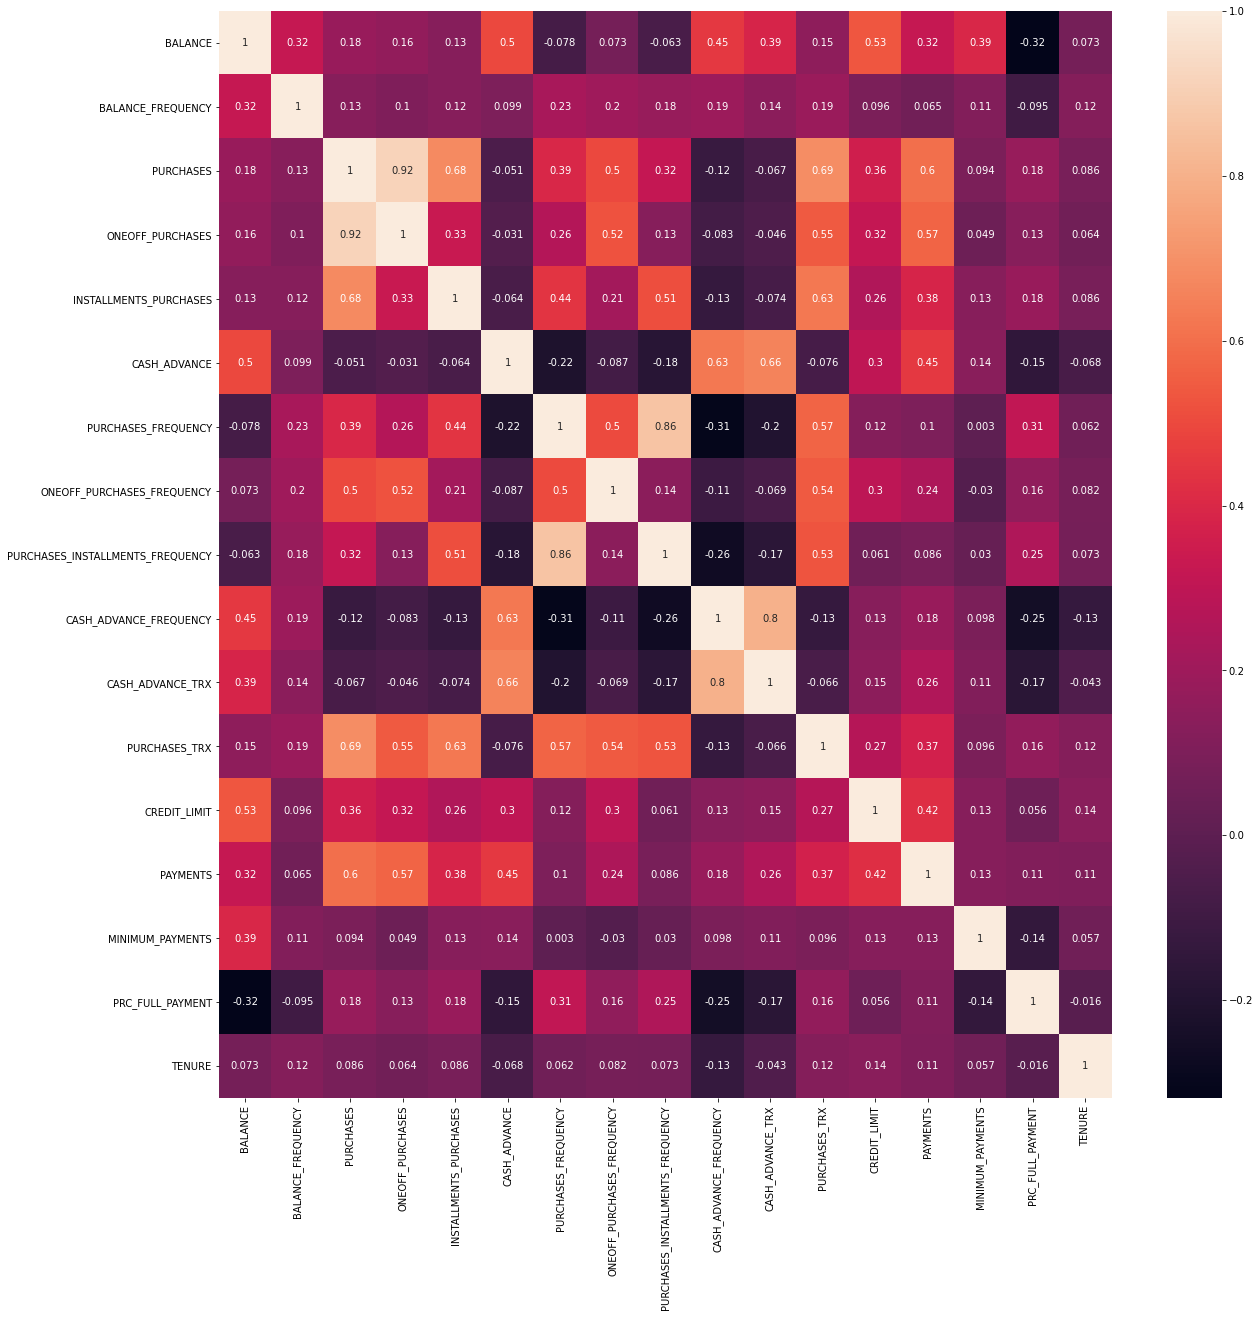

In [9]:
# Корреляционная матрица (матрица корреляций) – это квадратная таблица, заголовками строк и столбцов которой являются обрабатываемые переменные, а на пересечении строк и столбцов выводятся коэффициенты корреляции для соответствующей пары признаков.
correlations = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True,)
plt.show("png")

### Нахождение оптимального количества кластеров с помощью метода локтя
- Метод локтя - это эвристический метод интерпретации и проверки согласованности в рамках кластерного анализа, призванный помочь найти подходящее количество кластеров в наборе данных. 
- Если линейный график выглядит как рука, то "локоть" на руке - это значение k, которое является наилучшим.
- Источник: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [10]:
# Для метода локтя надо отбросить все столбцы где график плотности сводится к одному значению
# Столбцы "BALANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "CREDIT_LIMIT" показывают достаточно широкую плотность
df_distplot = df[["BALANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "CREDIT_LIMIT"]]

# Давайте масштабируем данные
scaler = StandardScaler()
df_elbow = scaler.fit_transform(df_distplot)

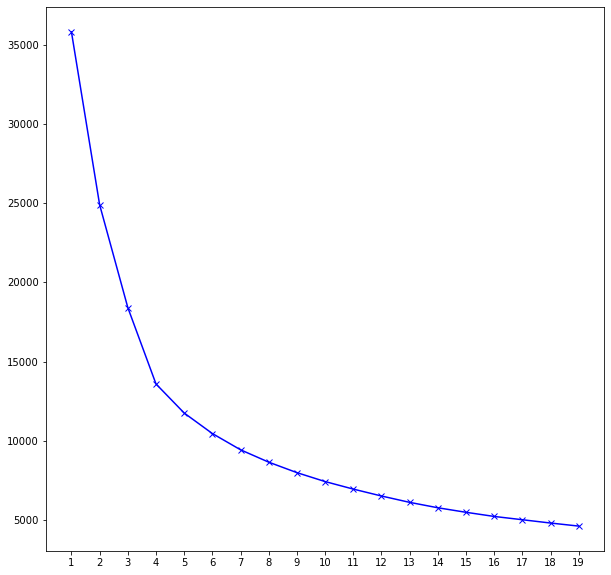

In [11]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_elbow)
    scores.append(kmeans.inertia_)

df_plot = pd.DataFrame(scores, range_values)

f, ax = plt.subplots(figsize = (10,10))
plt.xticks(range_values)
plt.plot(df_plot, "bx-")
plt.show("png")
# Из этого мы можем заметить, что 4-й кластер, похоже, формирует локоть кривой.

### Применяем метод k-средних

In [12]:
num_clusters = 4

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(num_clusters)
kmeans.fit(df_scaled)
labels = kmeans.labels_

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
1,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
2,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


In [13]:
# Для того чтобы понять, что означают эти числа, выполним обратное преобразование
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# Мы получаем 4 кластера клиентов и их средние значения на основе которых можно проводить аналитику. Допустим можно заметить что второй кластер с самым большим балансом (4602$) реже всего совершает покупки

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251086,0.034859,11.387312
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703152,974.505090,586.300856,0.078001,11.446429
2,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.166948,0.269258,11.594595
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815131,0.286707,11.951100


In [14]:
# Добавим в DataFrame новый столбец CLUSTER(К какому кластеру клиентов принадлежит клиент).
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.200000,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


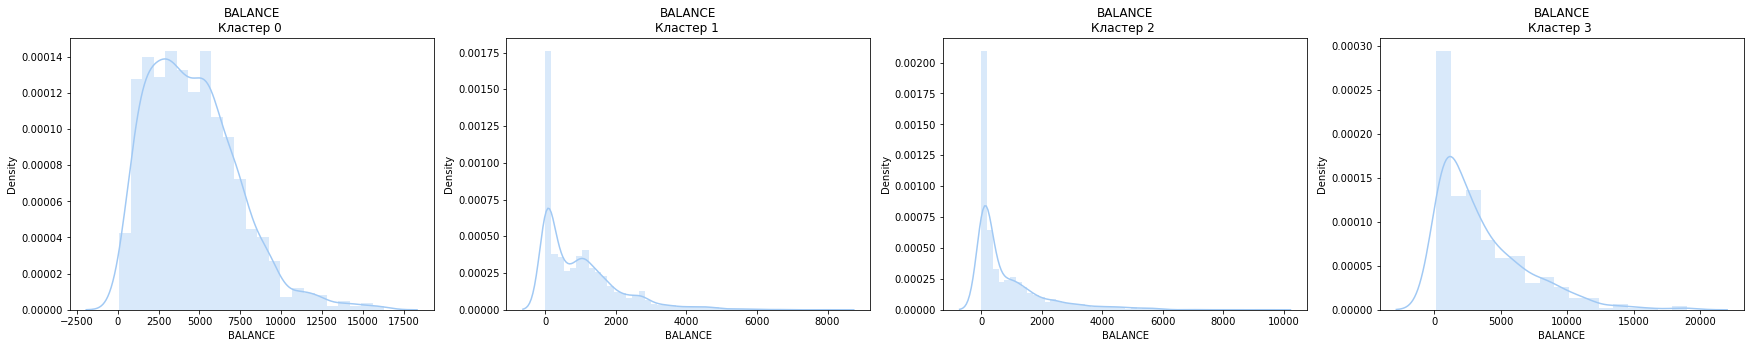

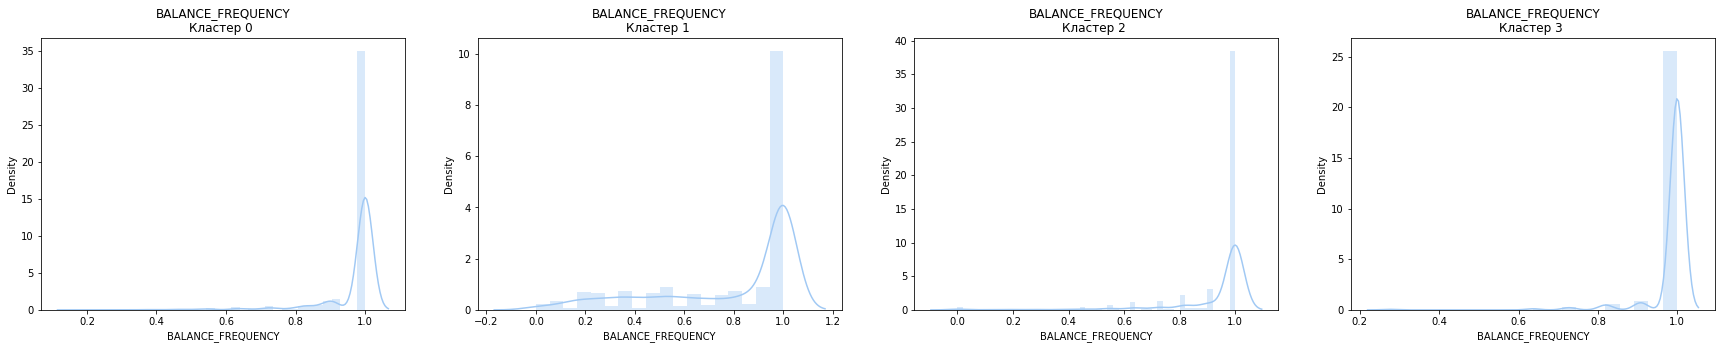

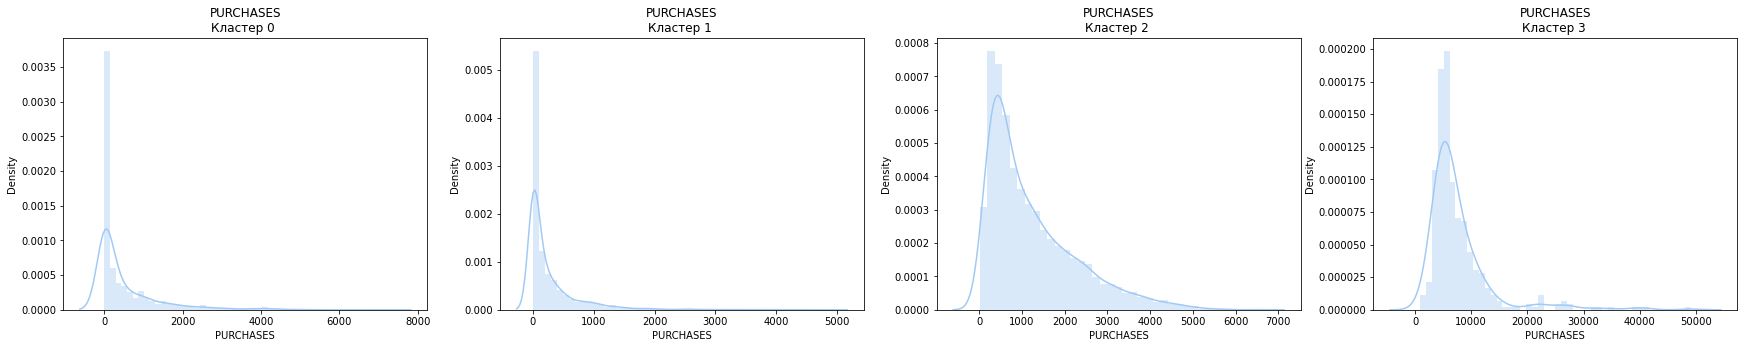

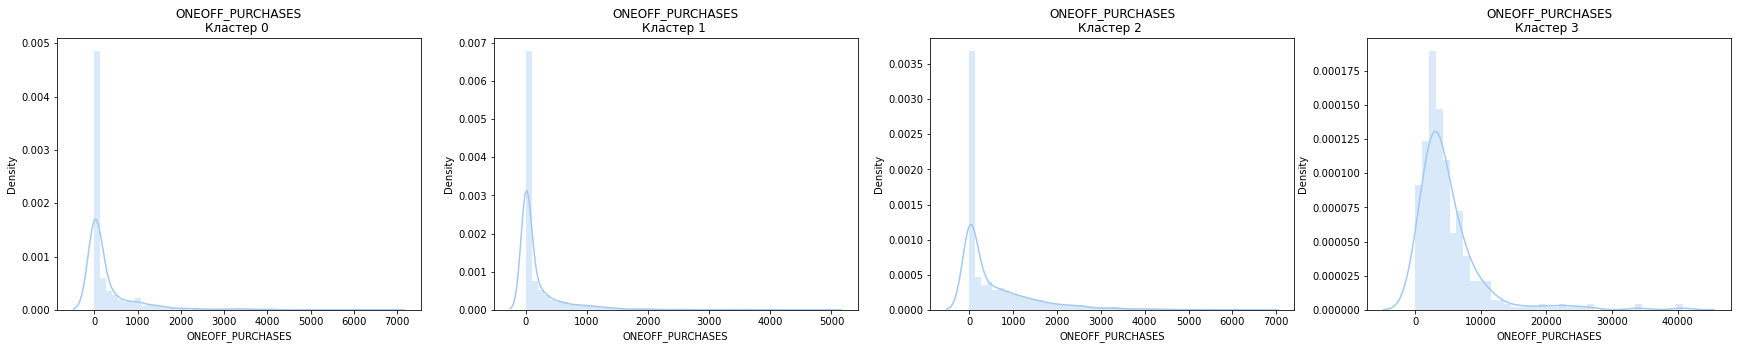

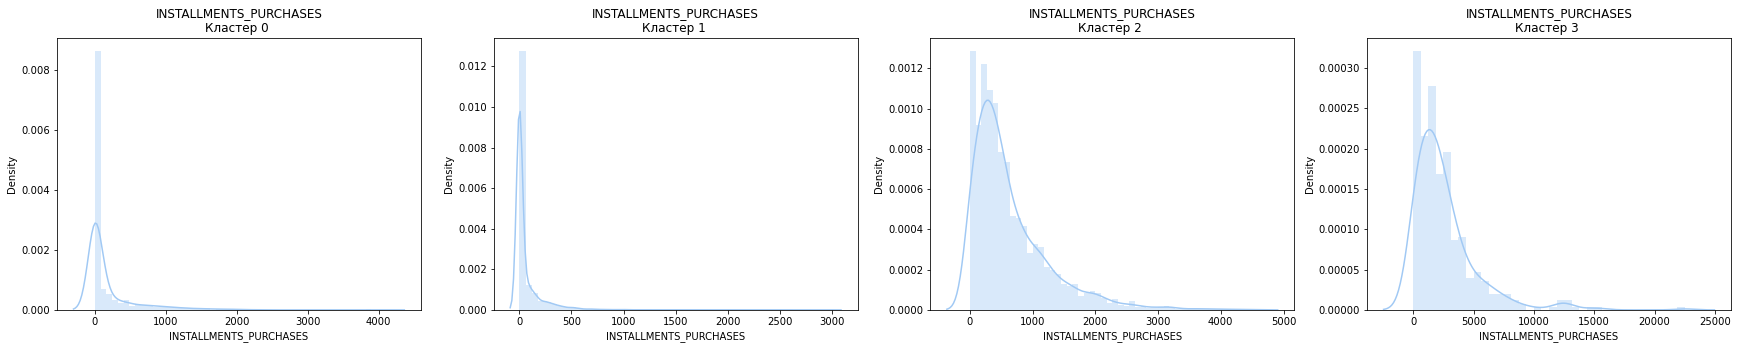

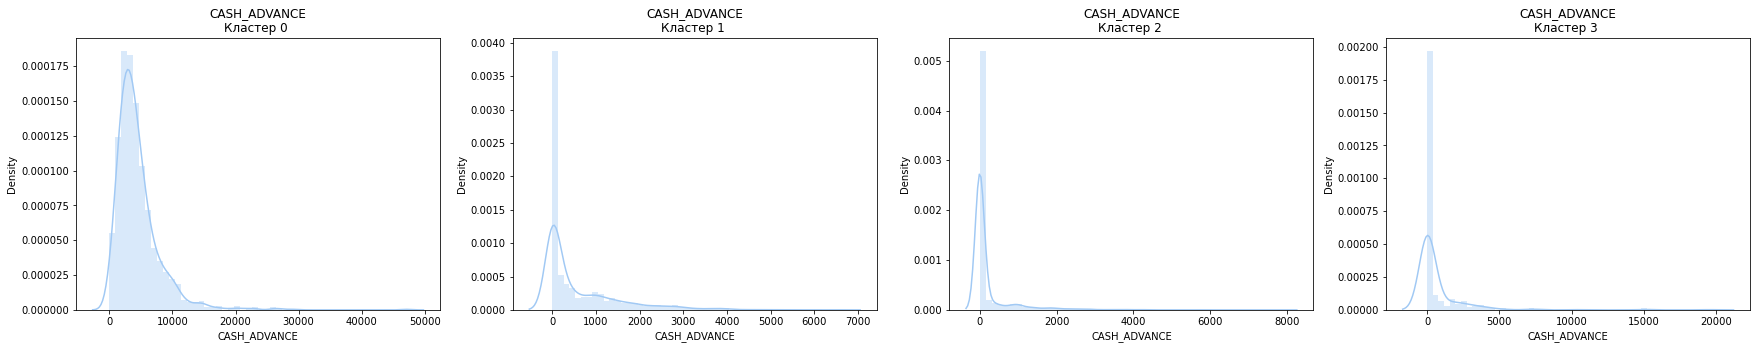

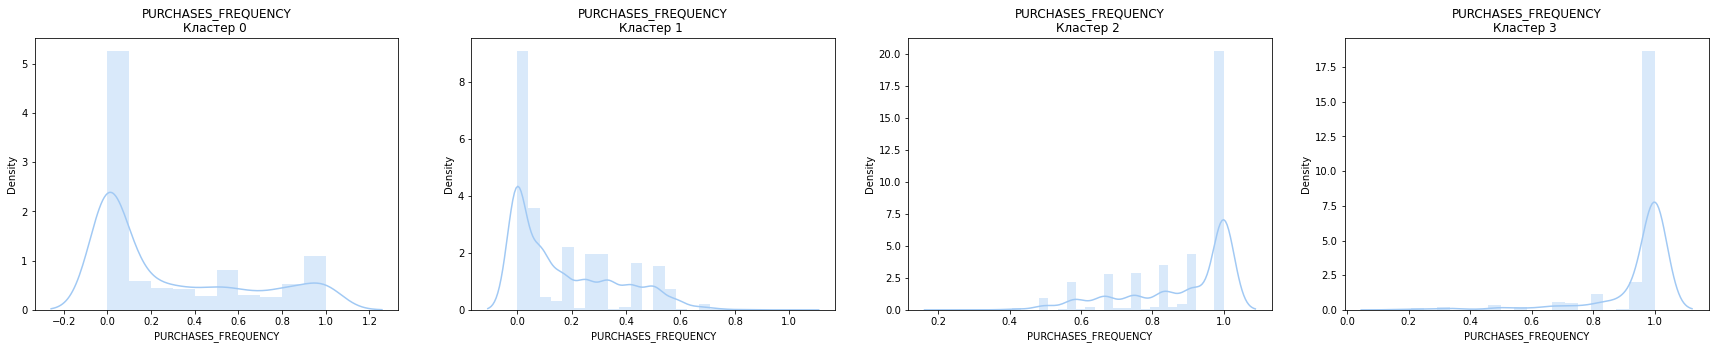

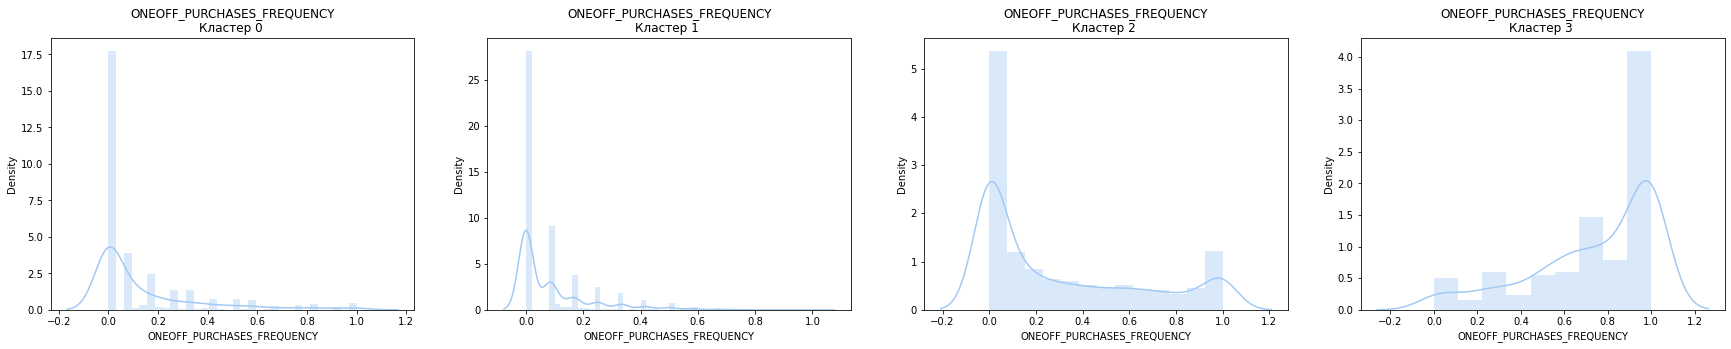

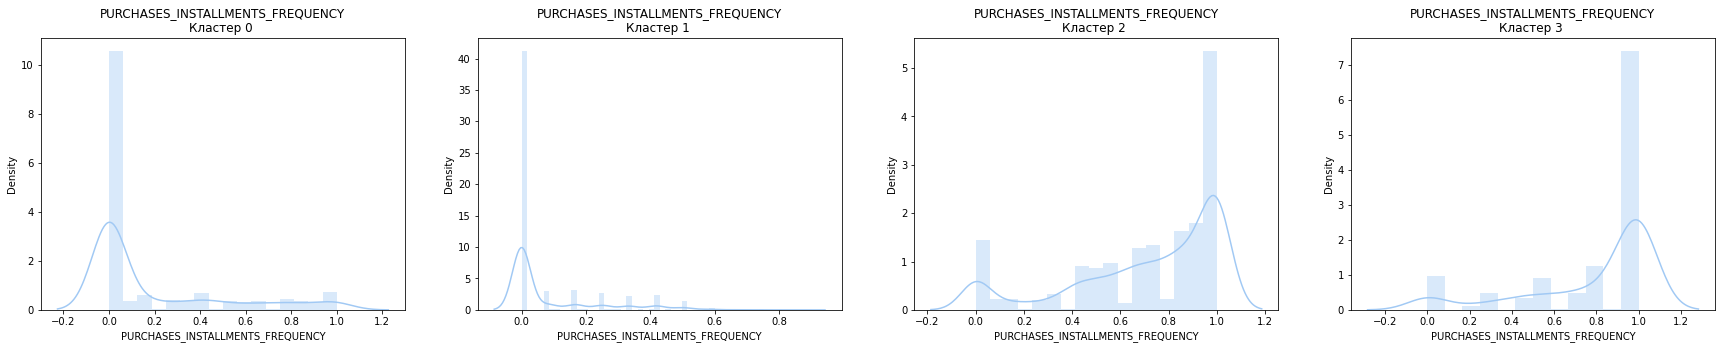

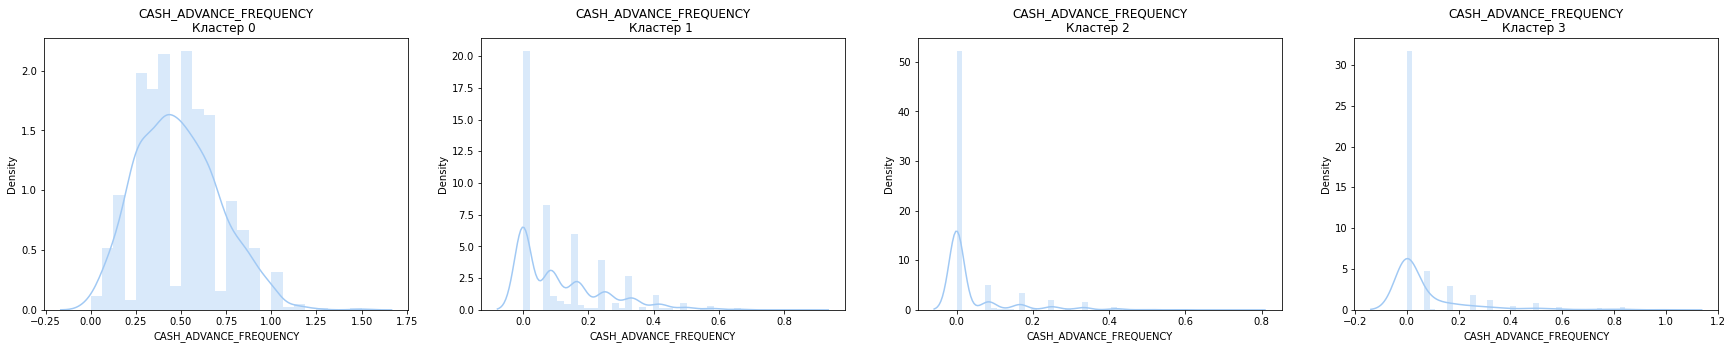

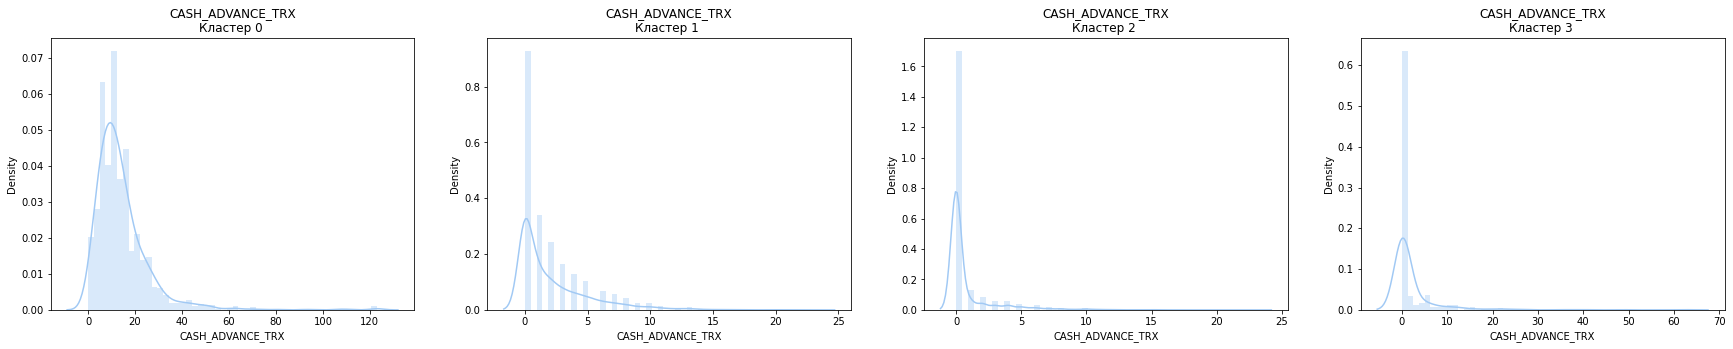

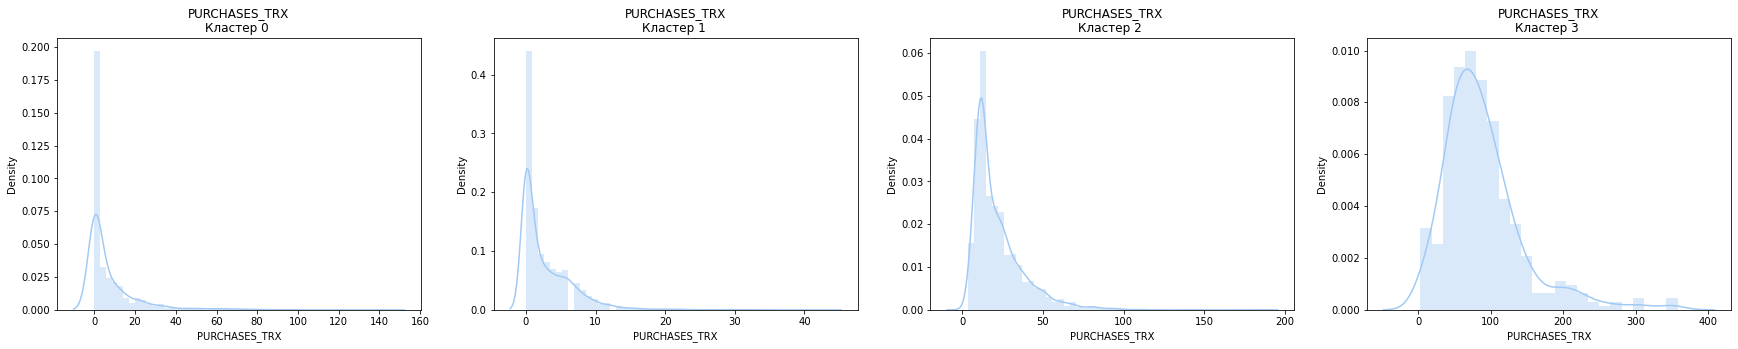

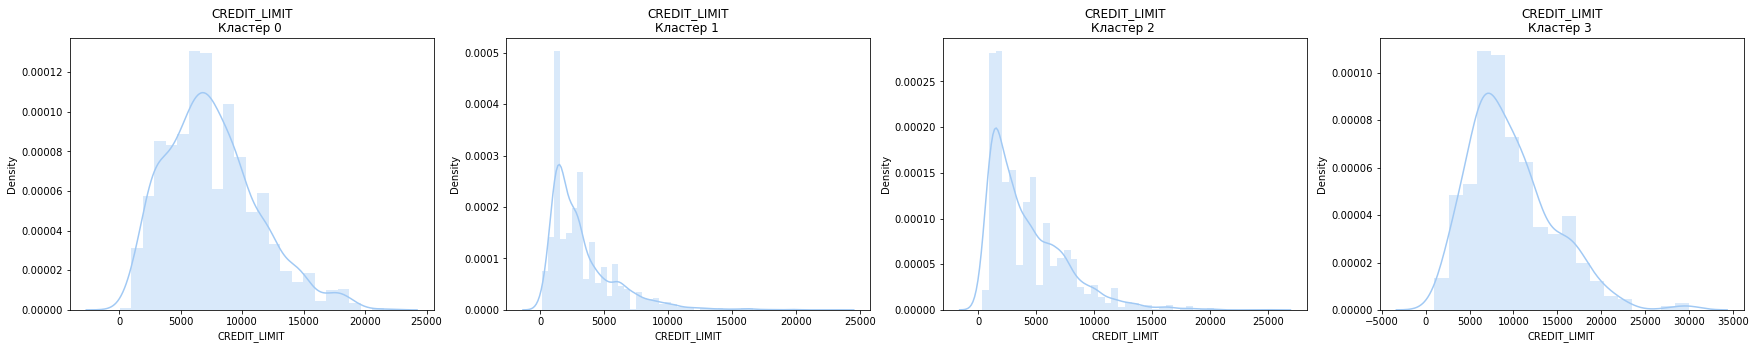

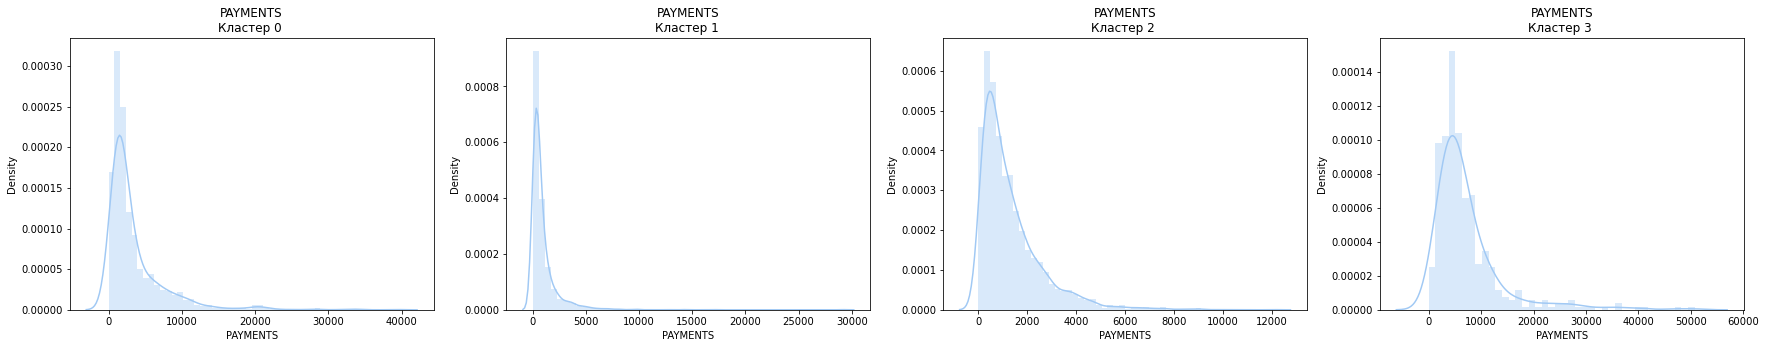

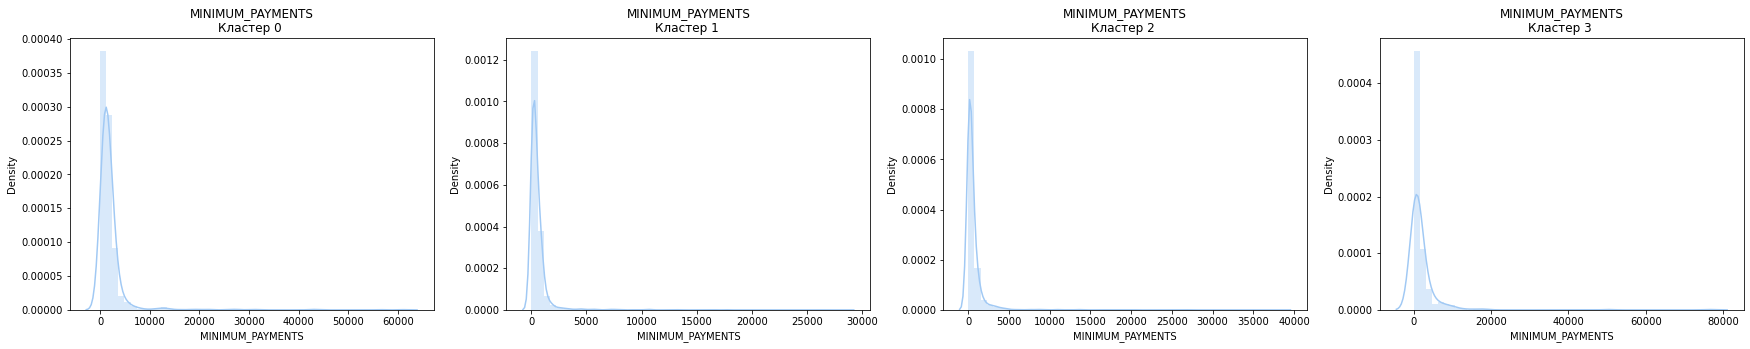

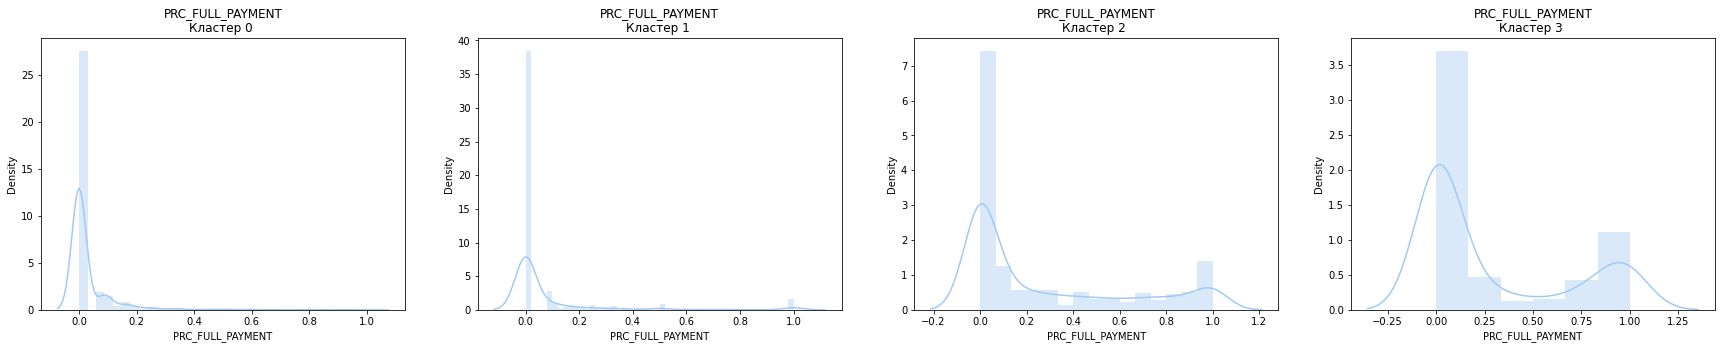

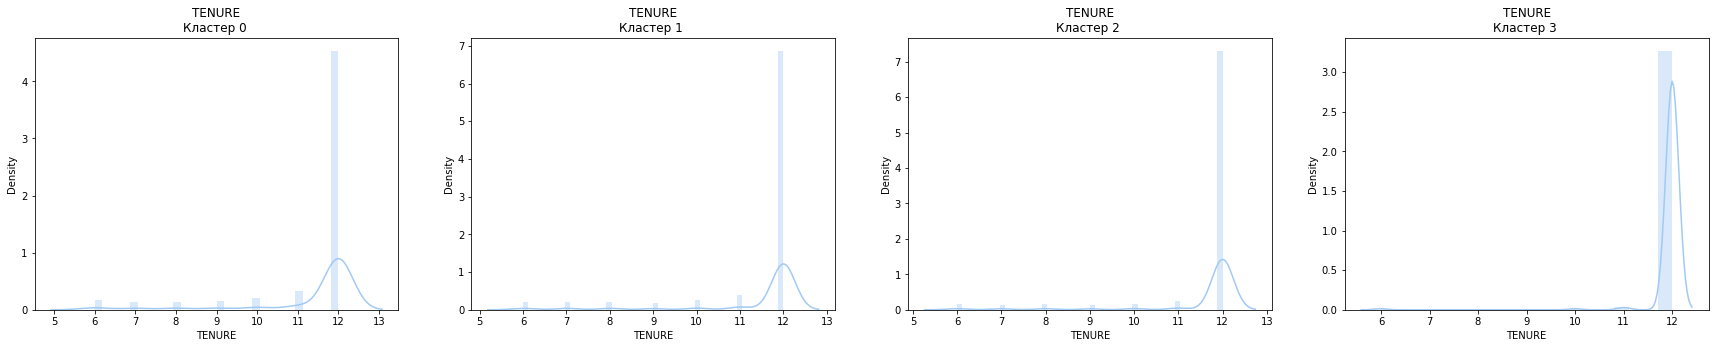

In [15]:
# Строим distplot различных кластеров

for i in df.columns:
  plt.figure(figsize = (30, 5))
  for j in range(num_clusters):
    plt.subplot(1,num_clusters,j+1)
    cluster = df_cluster[df_cluster['CLUSTER'] == j]
    sns.distplot(cluster[i])
    plt.title('{}\nКластер {} '.format(i,j))
  
  plt.show("png")



### Применяемый анализ главных компонент и визуализируем результаты

In [16]:
# Получаем главные компоненты 
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222109, -1.07644853,  0.48851448],
       [-1.13830701,  2.5064898 ,  0.60088287],
       [ 0.9696816 , -0.3835165 ,  0.10233186],
       ...,
       [-0.92619962, -1.81078828, -0.47458095],
       [-2.33654371, -0.65797454,  0.97494441],
       [-0.55641892, -0.40047386,  1.01520391]])

In [17]:
# Создаем датафрейм с тремя компонентами
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-1.682221,-1.076449,0.488514
1,-1.138307,2.506490,0.600883
2,0.969682,-0.383517,0.102332
3,-0.873634,0.043173,1.460015
4,-1.599432,-0.688582,0.365186


In [18]:
# Конкатенируйте метки кластеров в DataFrame
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-1.682221,-1.076449,0.488514,1
1,-1.138307,2.506490,0.600883,0
2,0.969682,-0.383517,0.102332,2
3,-0.873634,0.043173,1.460015,1
4,-1.599432,-0.688582,0.365186,1


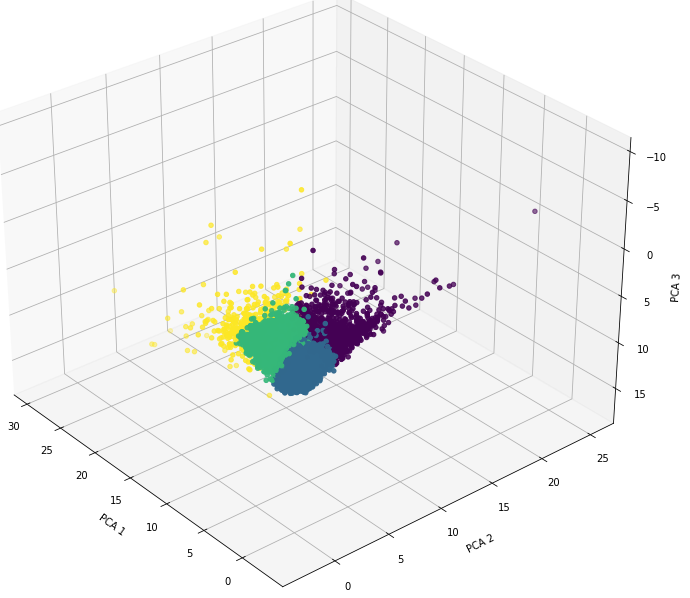

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_df['pca1']
y = pca_df['pca2']
z = pca_df['pca3']
c = pca_df['cluster']

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.azim = 40
ax.dist = 8
ax.elev = 570

ax.scatter(x, y, z, c=c)
plt.show("png")